<a href="https://colab.research.google.com/github/crayglockes/optimization/blob/main/Python_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Generate a small dataset
def generate_data(n=20, theta_true=2.5, noise_std=0.5):
    """Generate synthetic data: y = theta * x + epsilon"""
    x = np.linspace(0, 5, n)
    y = theta_true * x + np.random.normal(0, noise_std, n)
    return x, y

In [ ]:
# Loss function: Sum of Squared Errors (SSE)
def sse_loss(theta, x, y):
    """Compute sum of squared errors: L(θ) = Σ(y_i - θ*x_i)²"""
    return np.sum((y - theta * x) ** 2)

# Gradient of SSE
def gradient(theta, x, y):
    """Gradient of SSE: dL/dθ = -2 * Σ(x_i * (y_i - θ*x_i))"""
    return -2 * np.sum(x * (y - theta * x))

# Hessian of SSE
def hessian(theta, x, y):
    """Hessian of SSE: d²L/dθ² = 2 * Σ(x_i²)"""
    return 2 * np.sum(x ** 2)

In [ ]:
# Newton-Raphson optimization
def newton_raphson(x, y, theta_init=0.0, tol=1e-8, max_iter=100):
    """
    Newton-Raphson method for optimization

    Parameters:
    -----------
    x, y : data
    theta_init : initial guess for theta
    tol : convergence tolerance
    max_iter : maximum number of iterations

    Returns:
    --------
    theta_history : list of theta values at each iteration
    loss_history : list of loss values at each iteration
    theta_opt : optimal theta value
    """
    theta = theta_init
    theta_history = [theta]
    loss_history = [sse_loss(theta, x, y)]

    print(f"Starting Newton-Raphson optimization")
    print(f"Initial guess: θ = {theta:.4f}")
    print(f"Initial loss: {loss_history[0]:.4f}")
    print("-" * 50)

    for i in range(max_iter):
        # Compute gradient and Hessian
        g = gradient(theta, x, y)
        h = hessian(theta, x, y)

        # Newton update: θ_new = θ_old - H⁻¹ * g
        theta_new = theta - g / h

        # Store history
        theta_history.append(theta_new)
        loss_history.append(sse_loss(theta_new, x, y))

        # Check convergence
        if abs(theta_new - theta) < tol:
            print(f"Converged after {i+1} iterations")
            break

        # Update theta
        theta = theta_new

        # Print iteration info
        print(f"Iteration {i+1}: θ = {theta:.6f}, Loss = {loss_history[-1]:.6f}, "
              f"Gradient = {g:.6f}")

    return theta_history, loss_history, theta

In [ ]:
# Alternative: Gradient Descent implementation
def gradient_descent(x, y, theta_init=0.0, learning_rate=0.01,
                     tol=1e-8, max_iter=1000):
    """
    Gradient descent for comparison
    """
    theta = theta_init
    theta_history = [theta]
    loss_history = [sse_loss(theta, x, y)]

    for i in range(max_iter):
        g = gradient(theta, x, y)
        theta_new = theta - learning_rate * g

        theta_history.append(theta_new)
        loss_history.append(sse_loss(theta_new, x, y))

        if abs(theta_new - theta) < tol:
            break

        theta = theta_new

    return theta_history, loss_history, theta

In [ ]:
# Generate data
x, y = generate_data(n=20, theta_true=2.5, noise_std=0.5)
print("Dataset Summary:")
print(f"x range: [{x.min():.2f}, {x.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")
print(f"True relationship: y = 2.5 * x + ε")
print("=" * 50)

Dataset Summary:
x range: [0.00, 5.00]
y range: [0.55, 12.60]
True relationship: y = 2.5 * x + ε


In [ ]:
# Run Newton-Raphson optimization
theta_init = 0.0  # Starting far from true value for demonstration
theta_history, loss_history, theta_opt = newton_raphson(x, y, theta_init=theta_init)

Starting Newton-Raphson optimization
Initial guess: θ = 0.0000
Initial loss: 1025.0779
--------------------------------------------------
Iteration 1: θ = 2.442935, Loss = 4.247906, Gradient = -835.740760
Converged after 2 iterations


In [ ]:
# Also compute analytical solution for comparison
theta_analytical = np.sum(x * y) / np.sum(x ** 2)

print("\n" + "=" * 50)
print("OPTIMIZATION RESULTS")
print("=" * 50)
print(f"Optimal θ (Newton): {theta_opt:.6f}")
print(f"Analytical solution: {theta_analytical:.6f}")
print(f"Final loss: {loss_history[-1]:.6f}")
print(f"Number of iterations: {len(theta_history)-1}")


OPTIMIZATION RESULTS
Optimal θ (Newton): 2.442935
Analytical solution: 2.442935
Final loss: 4.247906
Number of iterations: 2


In [ ]:
# Create summary table
print("\n" + "=" * 50)
print("OPTIMIZATION PATH")
print("=" * 50)
print(f"{'Iteration':<10} {'θ':<15} {'Loss':<15} {'Gradient':<15}")
print("-" * 55)
for i, (theta_val, loss_val) in enumerate(zip(theta_history, loss_history)):
    if i < len(theta_history) - 1:
        g = gradient(theta_val, x, y)
    else:
        g = gradient(theta_val, x, y)
    print(f"{i:<10} {theta_val:<15.6f} {loss_val:<15.6f} {g:<15.6f}")


OPTIMIZATION PATH
Iteration  θ               Loss            Gradient       
-------------------------------------------------------
0          0.000000        1025.077887     -835.740760    
1          2.442935        4.247906        0.000000       
2          2.442935        4.247906        0.000000       


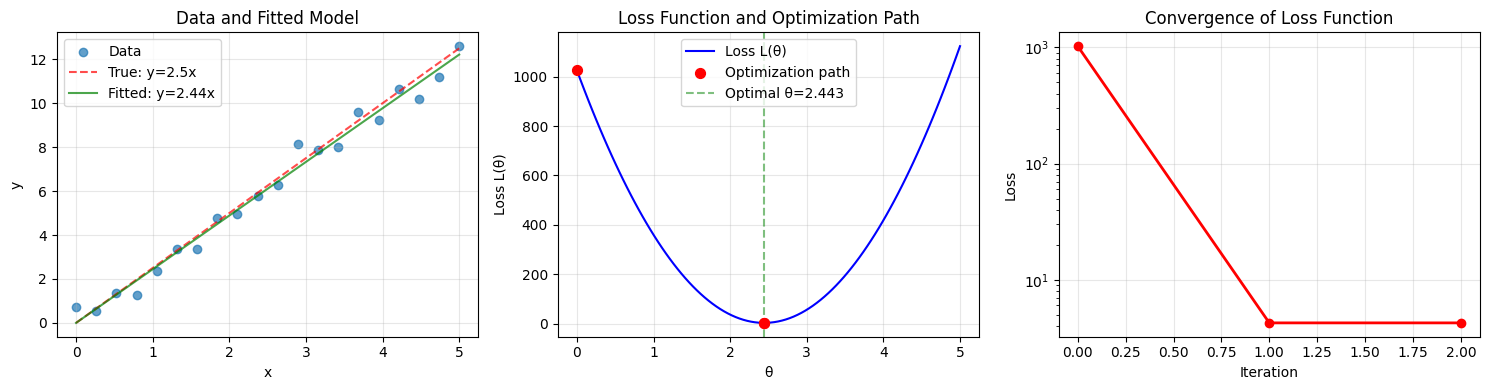

In [ ]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. Data and fitted line
axes[0].scatter(x, y, alpha=0.7, label='Data')
x_line = np.linspace(0, 5, 100)
y_true = 2.5 * x_line
y_fitted = theta_opt * x_line
axes[0].plot(x_line, y_true, 'r--', alpha=0.7, label='True: y=2.5x')
axes[0].plot(x_line, y_fitted, 'g-', alpha=0.7, label=f'Fitted: y={theta_opt:.2f}x')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Data and Fitted Model')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Loss function landscape
theta_range = np.linspace(0, 5, 100)
loss_vals = [sse_loss(t, x, y) for t in theta_range]
axes[1].plot(theta_range, loss_vals, 'b-', label='Loss L(θ)')
axes[1].scatter(theta_history, loss_history, c='r', s=50,
                label='Optimization path', zorder=5)
axes[1].axvline(theta_opt, color='g', linestyle='--', alpha=0.5, label=f'Optimal θ={theta_opt:.3f}')
axes[1].set_xlabel('θ')
axes[1].set_ylabel('Loss L(θ)')
axes[1].set_title('Loss Function and Optimization Path')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Convergence plot
axes[2].plot(range(len(loss_history)), loss_history, 'ro-', linewidth=2)
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Loss')
axes[2].set_title('Convergence of Loss Function')
axes[2].grid(True, alpha=0.3)
axes[2].set_yscale('log')

plt.tight_layout()
plt.savefig('optimization_results.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# Compare with gradient descent for context
print("\n" + "=" * 50)
print("COMPARISON WITH GRADIENT DESCENT")
print("=" * 50)
theta_gd, loss_gd, theta_opt_gd = gradient_descent(x, y, theta_init=theta_init,
                                                    learning_rate=0.01)
print(f"Gradient Descent (LR=0.01): θ = {theta_opt_gd:.6f}, "
      f"Loss = {loss_gd[-1]:.6f}, Iterations = {len(theta_gd)-1}")
print(f"Newton-Raphson converges much faster due to using second-order information.")


COMPARISON WITH GRADIENT DESCENT
Gradient Descent (LR=0.01): θ = nan, Loss = nan, Iterations = 1000
Newton-Raphson converges much faster due to using second-order information.


/tmp/ipython-input-2470879042.py:4: RuntimeWarning: overflow encountered in square
  return np.sum((y - theta * x) ** 2)
/tmp/ipython-input-2470879042.py:4: RuntimeWarning: invalid value encountered in multiply
  return np.sum((y - theta * x) ** 2)
/tmp/ipython-input-2470879042.py:9: RuntimeWarning: invalid value encountered in multiply
  return -2 * np.sum(x * (y - theta * x))
